# Exploratory data analysis

The goal of this notebook is to perform an initial data exploration and explore the preprocessing operations required to generate a clean dataset for modeling.

In [23]:
import os
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

from pandas_profiling import ProfileReport

pd.set_option('display.max_columns', 150)

## Access data

Raw dataset for the project is available on "data" folder.

In [24]:
DIR_REPO = Path.cwd().parent.parent
DIR_DATA_RAW = Path(DIR_REPO) / "data" / "raw"

In [25]:
os.listdir(DIR_DATA_RAW)

['listings.csv']

This is the file as downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) under the Creative Commons Universal licence (CC0 1.0).

In [26]:
FILEPATH_DATA = DIR_DATA_RAW / "listings.csv"

In [27]:
df_raw = pd.read_csv(FILEPATH_DATA)
df_raw.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,3,33,63,338,2021-12-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,69%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",$75.00,1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,3,6,18,194,2021-12-05,409,32,0,2015-01-05,2021-10-22,4.45,4.58,4.49,4.78,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365

## Generate EDA report

In [28]:
profile = ProfileReport(df_raw, title="Pandas Profiling Report", minimal=True)
profile.to_file("raw_data_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

An html file named output.html has been created with an EDA.

## Modify df according to EDA

### Select columns

bathrooms column is empty, so we have to get this value from bathrooms_text column

In [29]:
df_raw.drop(columns=['bathrooms'], inplace=True)

In [30]:
# Get number of bathrooms from `bathrooms_text`
def num_bathroom_from_text(text):
    try:
        if isinstance(text, str):
            bath_num = text.split(" ")[0]
            return float(bath_num)
        else:
            return np.NaN
    except ValueError:
        return np.NaN

In [31]:
df_raw['bathrooms'] = df_raw['bathrooms_text'].apply(num_bathroom_from_text)

For an initial model, we are only going to use a small subset of the columns.

In [32]:
COLUMNS = ['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds','amenities', 'price']

In [33]:
df = df_raw[COLUMNS].copy()
df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)
df.head()

,id,neighbourhood,property_type,room_type,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price
0,2595,Manhattan,Entire rental unit,Entire home/apt,40.75356,-73.98559,1,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00
1,3831,Brooklyn,Entire guest suite,Entire home/apt,40.68494,-73.95765,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",$75.00
2,5121,Brooklyn,Private room in rental unit,Private room,40.68535,-73.95512,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",...",$60.00
3,5136,Brooklyn,Entire rental unit,Entire home/apt,40.66265,-73.99454,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",$275.00
4,5178,Manhattan,Private room in rental unit,Private room,40.76457,-73.98317,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",$68.00


### Check for missing values

In [34]:
df.isna().sum()

id                  0
neighbourhood       0
property_type       0
room_type           0
latitude            0
longitude           0
accommodates        0
bathrooms         173
bedrooms         3975
beds             2405
amenities           0
price               0
dtype: int64

In [35]:
df = df.dropna(axis=0)

### Check the target variable

In [36]:
# Convert string to numeric
df['price'] = df['price'].str.extract(r"(\d+).")
df['price'] = df['price'].astype(int)

In [37]:
# Summary statistics
df['price'].describe()

count    32191.000000
mean       148.731757
std        130.718689
min          1.000000
25%         65.000000
50%        109.000000
75%        185.000000
max        999.000000
Name: price, dtype: float64

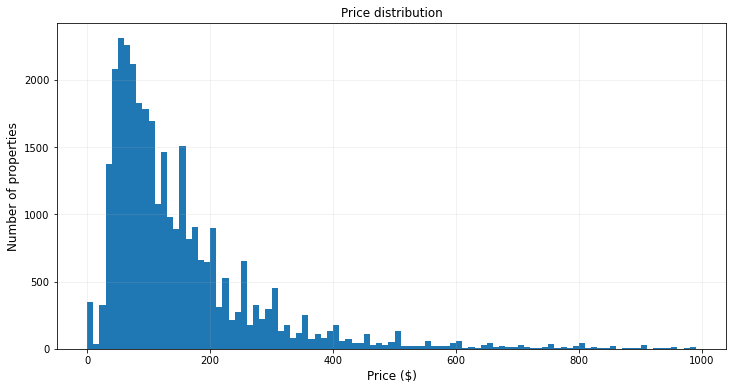

In [38]:
# Plot price distribution

fontsize_labels = 12

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['price'], bins=range(0, max(df['price']), 10))
ax.grid(alpha=0.2)
ax.set_title('Price distribution', fontsize=fontsize_labels)
ax.set_ylabel('Number of properties', fontsize=fontsize_labels)
ax.set_xlabel('Price ($)', fontsize=fontsize_labels)
plt.show()

Remove the listings where price is between 0 and 10 dollars.

In [39]:
df = df[df['price'] >= 10]

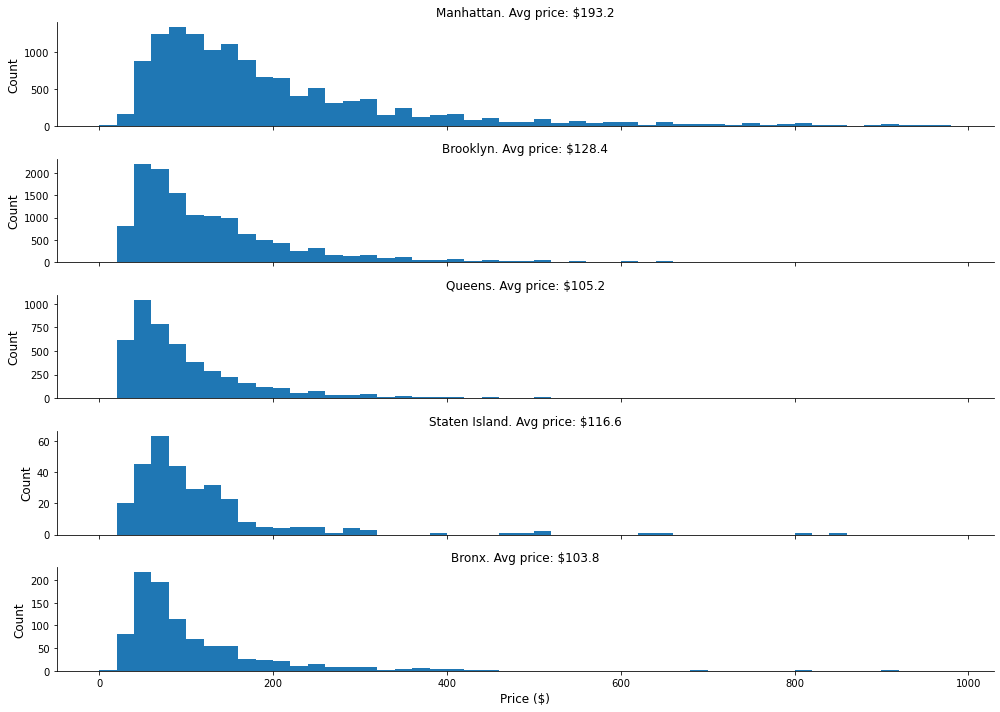

In [40]:
# Break down by neighbourhood:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 10), sharex=True)

axes = [ax1, ax2, ax3, ax4, ax5]
neighbourhood = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

for i, ax in enumerate(axes):
    values = df[df['neighbourhood'] == neighbourhood[i]]['price']
    avg = round(values.mean(), 1)
    ax.hist(values, bins=range(0, max(df['price']), 20))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{neighbourhood[i]}. Avg price: ${avg}', fontsize=fontsize_labels)
    ax.set_ylabel('Count', fontsize=fontsize_labels)

ax.set_xlabel('Price ($)', fontsize=fontsize_labels)

plt.tight_layout()
plt.show()

In [41]:
# Create a categorical price column corresponding to Low ($0-$90), Mid ($90-$180), High ($180-$400) and Luxury ($400+) properties

df['category'] = pd.cut(df['price'], bins=[0, 90, 180, 400, np.inf], labels=[0, 1, 2, 3])
df.head()

,id,neighbourhood,property_type,room_type,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,category
1,3831,Brooklyn,Entire guest suite,Entire home/apt,40.68494,-73.95765,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75,0
3,5136,Brooklyn,Entire rental unit,Entire home/apt,40.66265,-73.99454,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275,2
4,5178,Manhattan,Private room in rental unit,Private room,40.76457,-73.98317,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68,0
5,5203,Manhattan,Private room in rental unit,Private room,40.80380,-73.96751,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75,0
8,6872,Manhattan,Private room in condominium (condo),Private room,40.80107,-73.94255,1,1.0,1.0,1.0,"[""Hangers"", ""Kitchen"", ""Luggage dropoff allowe...",65,0


### Extract column information for amenities

In [42]:
def preprocess_amenities_column(df: DataFrame) -> DataFrame:
    
    df['TV'] = df['amenities'].str.contains('TV')
    df['TV'] = df['TV'].astype(int)
    df['Internet'] = df['amenities'].str.contains('Internet')
    df['Internet'] = df['Internet'].astype(int)
    df['Air_conditioning'] = df['amenities'].str.contains('Air conditioning')
    df['Air_conditioning'] = df['Air_conditioning'].astype(int)
    df['Kitchen'] = df['amenities'].str.contains('Kitchen')
    df['Kitchen'] = df['Kitchen'].astype(int)
    df['Heating'] = df['amenities'].str.contains('Heating')
    df['Heating'] = df['Heating'].astype(int)
    df['Wifi'] = df['amenities'].str.contains('Wifi')
    df['Wifi'] = df['Wifi'].astype(int)
    df['Elevator'] = df['amenities'].str.contains('Elevator')
    df['Elevator'] = df['Elevator'].astype(int)
    df['Breakfast'] = df['amenities'].str.contains('Breakfast')
    df['Breakfast'] = df['Breakfast'].astype(int)

    df.drop('amenities', axis=1, inplace=True)
    
    return df


df = preprocess_amenities_column(df)
df.head()

,id,neighbourhood,property_type,room_type,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,category,TV,Internet,Air_conditioning,Kitchen,Heating,Wifi,Elevator,Breakfast
1,3831,Brooklyn,Entire guest suite,Entire home/apt,40.68494,-73.95765,3,1.0,1.0,3.0,75,0,1,0,1,1,1,1,0,0
3,5136,Brooklyn,Entire rental unit,Entire home/apt,40.66265,-73.99454,4,1.5,2.0,2.0,275,2,1,0,1,1,1,1,0,0
4,5178,Manhattan,Private room in rental unit,Private room,40.76457,-73.98317,2,1.0,1.0,1.0,68,0,1,0,1,0,1,1,0,0
5,5203,Manhattan,Private room in rental unit,Private room,40.80380,-73.96751,1,1.0,1.0,1.0,75,0,0,0,1,0,1,1,1,1
8,6872,Manhattan,Private room in condominium (condo),Private room,40.80107,-73.94255,1,1.0,1.0,1.0,65,0,0,0,0,1,1,1,1,0


In [43]:
DIR_DATA_PROCESSED = Path(DIR_REPO) / "data" / "processed"
FILEPATH_DATA = DIR_DATA_PROCESSED / "preprocessed_listings.csv"

df.to_csv(FILEPATH_DATA)